In [7]:
library(data.table)
library(ggplot2)
library(latex2exp)

In [26]:
mypath <- "../../log/URV-2-news-truncated"

In [3]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

## 1 news

In [ ]:
time <- as.integer(50)

In [5]:
N_AGENTS <- 1134

In [ ]:
N_AGENTS <- 12625

In [ ]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [ ]:
list.dirs(mypath)

In [ ]:
thepath = list.dirs(mypath)[1]
thepath

In [ ]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")
memfile = paste(mypath, '/', thepath, '/', 'memoryLog.csv', sep = "")

In [ ]:
DF <- read.csv(file = filename, skip=12)

In [ ]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [ ]:
tempDF

In [ ]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [ ]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [ ]:
DT <- data.table(DF)

In [ ]:
DT1 = DT[, sum(density), by=list(time, state)]

In [ ]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [ ]:
DT1$density <- DT1$density / N_AGENTS

In [ ]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [ ]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 120]
density <- as.numeric(tempDT1[,'density'])

In [ ]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## 2 news

In [54]:
time <- as.integer(50)

In [1]:
N_AGENTS <- 1134

In [ ]:
N_AGENTS <- 12625

In [2]:
mypath <- "../../log/URV-2-news-truncated"

In [3]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [4]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [5]:
list.dirs(mypath)

[1] "2019_15_03_15_49_57" "2019_15_03_15_50_05" "2019_15_03_15_50_11"
  [4] "2019_15_03_15_50_12" "2019_15_03_15_50_18" "2019_15_03_15_50_20"
  [7] "2019_15_03_15_50_25" "2019_15_03_15_50_26" "2019_15_03_15_50_33"
 [10] "2019_15_03_15_50_34" "2019_15_03_15_50_41" "2019_15_03_15_50_43"
 [13] "2019_15_03_15_50_49" "2019_15_03_15_50_51" "2019_15_03_15_50_57"
 [16] "2019_15_03_15_50_58" "2019_15_03_15_51_05" "2019_15_03_15_51_06"
 [19] "2019_15_03_15_51_13" "2019_15_03_15_51_15" "2019_15_03_15_51_22"
 [22] "2019_15_03_15_51_23" "2019_15_03_15_51_31" "2019_15_03_15_51_38"
 [25] "2019_15_03_15_51_39" "2019_15_03_15_51_45" "2019_15_03_15_51_46"
 [28] "2019_15_03_15_51_53" "2019_15_03_15_52_00" "2019_15_03_15_52_07"
 [31] "2019_15_03_15_52_15" "2019_15_03_15_53_43" "2019_15_03_15_53_52"
 [34] "2019_15_03_15_53_59" "2019_15_03_15_54_06" "2019_15_03_15_54_07"
 [37] "2019_15_03_15_54_13" "2019_15_03_15_54_14" "2019_15_03_15_54_21"
 [40] "2019_15_03_15_54_22" "2019_15_03_15_54_28" "2019_15_03_15_54_29"
 [43] "2019_15_03_15_54_35" "2019_15_03_15_54_37" "2019_15_03_15_54_43"
 [46] "2019_15_03_15_54_44" "2019_15_03_15_54_50" "2019_15_03_15_54_52"
 [49] "2019_15_03_15_54_58" "2019_15_03_15_55_00" "2019_15_03_15_55_05"
 [52] "2019_15_03_15_55_07" "2019_15_03_15_55_13" "2019_15_03_15_55_14"
 [55] "2019_15_03_15_55_21" "2019_15_03_15_55_22" "2019_15_03_15_55_29"
 [58] "2019_15_03_15_55_30" "2019_15_03_15_55_37" "2019_15_03_15_55_38"
 [61] "2019_15_03_15_55_45" "2019_15_03_15_55_46" "2019_15_03_15_55_52"
 [64] "2019_15_03_15_55_54" "2019_15_03_15_56_00" "2019_15_03_15_56_01"
 [67] "2019_15_03_15_56_08" "2019_15_03_15_56_09" "2019_15_03_15_56_16"
 [70] "2019_15_03_15_56_17" "2019_15_03_15_56_23" "2019_15_03_15_56_25"
 [73] "2019_15_03_15_56_31" "2019_15_03_15_56_32" "2019_15_03_15_56_39"
 [76] "2019_15_03_15_56_40" "2019_15_03_15_56_47" "2019_15_03_15_56_48"
 [79] "2019_15_03_15_56_55" "2019_15_03_15_56_56" "2019_15_03_15_57_03"
 [82] "2019_15_03_15_57_04" "2019_15_03_15_57_11" "2019_15_03_15_57_12"
 [85] "2019_15_03_15_57_19" "2019_15_03_15_57_20" "2019_15_03_15_57_26"
 [88] "2019_15_03_15_57_28" "2019_15_03_15_57_35" "2019_15_03_15_57_36"
 [91] "2019_15_03_15_57_42" "2019_15_03_15_57_44" "2019_15_03_15_57_50"
 [94] "2019_15_03_15_57_52" "2019_15_03_15_57_58" "2019_15_03_15_57_59"
 [97] "2019_15_03_15_58_06" "2019_15_03_15_58_07" "2019_15_03_15_58_14"
[100] "2019_15_03_15_58_15" "2019_15_03_15_58_22" "2019_15_03_15_58_23"
[103] "2019_15_03_15_58_30"

In [33]:
thepath = list.dirs(mypath)[11]

In [34]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")
memfile = paste(mypath, '/', thepath, '/', 'memoryLog.csv', sep = "")

In [35]:
kDF <- read.csv(file = filename, skip=12)
mDF <- read.csv(file = memfile, skip=12)

In [36]:
tempkDF <- kDF[kDF$state =='i',]
tempkDF <- tempkDF[tempkDF$time == 1,]

tempmDF <- mDF[mDF$spreadstate =='i',]
tempmDF <- tempmDF[tempmDF$time == 1,]

In [37]:
tempkDF
tempmDF

kcore1 <- as.integer(tempkDF[1,'k.core'])
kcore2 <- as.integer(tempkDF[2,'k.core'])

agent1 <- as.integer(tempkDF[1,'agent'])
agent2 <- as.integer(tempkDF[2,'agent'])
news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

agent1
news1
kcore1

agent2
news2
kcore2

,time,agent,k.core,state,degree
165,1,164,6,i,7
918,1,917,1,i,1


,agent,time,state,spreadstate,news0
165,164,1,u,i,t3xYetJmMs8kmTL5
918,917,1,u,i,f21rqf6bny23zQ9O


[1] 164

[1] "t3xYetJmMs8kmTL5"

[1] 6

[1] 917

[1] "f21rqf6bny23zQ9O"

[1] 1

In [38]:
tempkDF
tempmDF

kcore1 <- as.integer(tempkDF[1,'k.core'])
kcore2 <- as.integer(tempkDF[2,'k.core'])
if (kcore1 == kcore2){
    agent1 <- as.integer(tempkDF[1,'agent'])
    agent2 <- as.integer(tempkDF[2,'agent'])
} else {
    kcore1 <- min(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))
    kcore2 <- max(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))

    agent1 <- as.integer(tempkDF[tempkDF$k.core == kcore1,]['agent'])
    agent2 <- as.integer(tempkDF[tempkDF$k.core == kcore2,]['agent'])
}

news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

agent1
news1
kcore1

agent2
news2
kcore2

,time,agent,k.core,state,degree
165,1,164,6,i,7
918,1,917,1,i,1


,agent,time,state,spreadstate,news0
165,164,1,u,i,t3xYetJmMs8kmTL5
918,917,1,u,i,f21rqf6bny23zQ9O


[1] 917

[1] "f21rqf6bny23zQ9O"

[1] 1

[1] 164

[1] "t3xYetJmMs8kmTL5"

[1] 6

In [39]:
mDF$'density' <- 1
mDF$'k.core.tuple' <- paste(toString(kcore1), toString(kcore2), sep=",")

In [40]:
mDT <- data.table(mDF)

In [41]:
mDT1 = mDT[, sum(density), by=list(time, spreadstate, news0)]

In [42]:
names(mDT1)[names(mDT1)=="V1"] <- "density"

In [43]:
mDT1$density <- mDT1$density / N_AGENTS

In [44]:
mDT1[mDT1$time == 50,]

time,spreadstate,news0,density
50,s,0,0.5970017636684
50,r,t3xYetJmMs8kmTL5,0.3827160493827
50,r,f21rqf6bny23zQ9O,0.0202821869489


In [45]:
#mDT1 <- mDT1[mDT1$news0!=0,]

In [46]:
mDT1$k.core.init <- 0
mDT1$agent.init <- 0

mDT1[mDT1$news0==news1,]$k.core.init <- kcore1
mDT1[mDT1$news0==news2,]$k.core.init <- kcore2

mDT1[mDT1$news0==news1,]$agent.init <- agent1
mDT1[mDT1$news0==news2,]$agent.init <- agent2

In [47]:
mDT1[mDT1$time == 50]

time,spreadstate,news0,density,k.core.init,agent.init
50,s,0,0.5970017636684,0,0
50,r,t3xYetJmMs8kmTL5,0.3827160493827,6,164
50,r,f21rqf6bny23zQ9O,0.0202821869489,1,917


In [48]:
tempmDT1 <- mDT1[mDT1$spreadstate == 'r']
tempmDT1 <- tempmDT1[tempmDT1$time == 50]
density1 <- as.numeric(tempmDT1[tempmDT1$news0 == news1,][,'density'])
density2 <- as.numeric(tempmDT1[tempmDT1$news0 == news2,][,'density'])
density1
density2

[1] 0.0202821869489

[1] 0.382716049383

In [49]:
tempmDT1

time,spreadstate,news0,density,k.core.init,agent.init
50,r,t3xYetJmMs8kmTL5,0.3827160493827,6,164
50,r,f21rqf6bny23zQ9O,0.0202821869489,1,917


In [50]:
mDT1$spreadstate[mDT1$news0 == 0] <- 'r'
mDT1 = mDT1[mDT1$spreadstate == 'r']

mDT1[,spreadstate:=NULL]

## All datasets 2 news

In [208]:
emptytable <- data.table()
lista = list.dirs(mypath)

for (i in lista){
    kcore1 <- 0
    kcore2 <- 0
    agent1 <- 0
    agent2 <- 0
    news1  <- 0
    news2  <- 0
    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    memfile = paste(mypath, '/', i , '/', 'memoryLog.csv', sep = "")
    #print(filename)
    
    kDF <- read.csv(file = filename, skip=12)
    mDF <- read.csv(file = memfile, skip=12)
    
    tempkDF <- kDF[kDF$state =='i',]
    tempkDF <- tempkDF[tempkDF$time == 1,]

    tempmDF <- mDF[mDF$spreadstate =='i',]
    tempmDF <- tempmDF[tempmDF$time == 1,]
    
    kcore1 <- as.integer(tempkDF[1,'k.core'])
    kcore2 <- as.integer(tempkDF[2,'k.core'])
    
    print(i)
    
    if (kcore1 == kcore2){
        agent1 <- as.integer(tempkDF[1,'agent'])
        agent2 <- as.integer(tempkDF[2,'agent'])
    } else {
        kcore1 <- min(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))
        kcore2 <- max(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))

        agent1 <- as.integer(tempkDF[tempkDF$k.core == kcore1,]['agent'])
        agent2 <- as.integer(tempkDF[tempkDF$k.core == kcore2,]['agent'])
    }

    news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
    news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

    mDF$'density' <- 1

    mDT <- data.table(mDF)
    mDT1 = mDT[, sum(density), by=list(time, spreadstate, news0)]
    names(mDT1)[names(mDT1)=="V1"] <- "density"
    mDT1$density <- mDT1$density / N_AGENTS

    mDT1$k.core.init <- 0
    mDT1$agent.init <- 0

    mDT1[mDT1$news0==news1,]$k.core.init <- kcore1
    mDT1[mDT1$news0==news2,]$k.core.init <- kcore2

    mDT1[mDT1$news0==news1,]$agent.init <- agent1
    mDT1[mDT1$news0==news2,]$agent.init <- agent2

    mDT1$spreadstate[mDT1$news0 == 0] <- 'r'
    mDT1 = mDT1[mDT1$spreadstate != 'i']
    mDT1[,spreadstate:=NULL]

    mDT1 <- rbindlist(list(mDT1, list(1, news1, 0., kcore1, agent1)))
    mDT1 <- rbindlist(list(mDT1, list(1, news2, 0., kcore2, agent2)))

    mDT1$news0[mDT1$news0 %in% "0"] <- "news 0"
    mDT1$news0[mDT1$news0 %in% news1] <- "news 1"
    mDT1$news0[mDT1$news0 %in% news2] <- "news 2"
    
    mDT1$k.core.init[mDT1$k.core.init %in% 0] <- -1
    mDT1$agent.init[mDT1$agent.init %in% 0] <- -1
    
    mDT1$'file' <- i
    mDT1$'sym' <- paste(toString(kcore1), toString(kcore2), sep="-")
    #print(mDT1)
    emptytable <- rbind(emptytable, mDT1)
}

[1] "2019_15_03_15_49_57"
[1] "2019_15_03_15_50_05"
[1] "2019_15_03_15_50_11"
[1] "2019_15_03_15_50_12"
[1] "2019_15_03_15_50_18"
[1] "2019_15_03_15_50_20"
[1] "2019_15_03_15_50_25"
[1] "2019_15_03_15_50_26"
[1] "2019_15_03_15_50_33"
[1] "2019_15_03_15_50_34"
[1] "2019_15_03_15_50_41"
[1] "2019_15_03_15_50_43"
[1] "2019_15_03_15_50_49"
[1] "2019_15_03_15_50_51"
[1] "2019_15_03_15_50_57"
[1] "2019_15_03_15_50_58"
[1] "2019_15_03_15_51_05"
[1] "2019_15_03_15_51_06"
[1] "2019_15_03_15_51_13"
[1] "2019_15_03_15_51_15"
[1] "2019_15_03_15_51_22"
[1] "2019_15_03_15_51_23"
[1] "2019_15_03_15_51_31"
[1] "2019_15_03_15_51_38"
[1] "2019_15_03_15_51_39"
[1] "2019_15_03_15_51_45"
[1] "2019_15_03_15_51_46"
[1] "2019_15_03_15_51_53"
[1] "2019_15_03_15_52_00"
[1] "2019_15_03_15_52_07"
[1] "2019_15_03_15_53_43"
[1] "2019_15_03_15_53_52"
[1] "2019_15_03_15_53_59"
[1] "2019_15_03_15_54_06"
[1] "2019_15_03_15_54_07"
[1] "2019_15_03_15_54_13"
[1] "2019_15_03_15_54_14"
[1] "2019_15_03_15_54_21"
[1] "2019_15

In [209]:
rawtable <- emptytable
rawtable <- rawtable[with(rawtable, order(time, file, news0)), ]
rawtable <- rawtable[rawtable$time < 15]
rawtable

time,news0,density,k.core.init,agent.init,file,sym
1,news 0,0.99823633157,-1,-1,2019_15_03_15_49_57,1-11
1,news 1,0.00000000000,1,1122,2019_15_03_15_49_57,1-11
1,news 2,0.00000000000,11,756,2019_15_03_15_49_57,1-11
1,news 0,0.99823633157,-1,-1,2019_15_03_15_50_05,1-1
1,news 1,0.00000000000,1,583,2019_15_03_15_50_05,1-1
1,news 2,0.00000000000,1,1074,2019_15_03_15_50_05,1-1
1,news 0,0.99823633157,-1,-1,2019_15_03_15_50_11,1-10
1,news 1,0.00000000000,1,939,2019_15_03_15_50_11,1-10
1,news 2,0.00000000000,10,274,2019_15_03_15_50_11,1-10
1,news 0,0.99823633157,-1,-1,2019_15_03_15_50_12,1-2


In [210]:
toplot <- rawtable[, mean(density), by=list(time, news0, k.core.init, sym)][,c('time', 'news0', 'k.core.init', 'sym')]
#toplot
toplot$mean <- rawtable[, mean(density), by=list(time, news0, k.core.init, sym)][,'V1']
toplot$std  <- rawtable[,   sd(density), by=list(time, news0, k.core.init, sym)][,'V1']
#toplot <- toplot[with(toplot, order(k.core.init, news0, time)), ]
toplot

time,news0,k.core.init,sym,mean,std
1,news 0,-1,1-11,0.99823633157,0
1,news 1,1,1-11,0.00000000000,0
1,news 2,11,1-11,0.00000000000,0
1,news 0,-1,1-1,0.99823633157,0
1,news 1,1,1-1,0.00000000000,0
1,news 2,1,1-1,0.00000000000,0
1,news 0,-1,1-10,0.99823633157,0
1,news 1,1,1-10,0.00000000000,0
1,news 2,10,1-10,0.00000000000,0
1,news 0,-1,1-2,0.99823633157,0


[[1]]


[[1]]


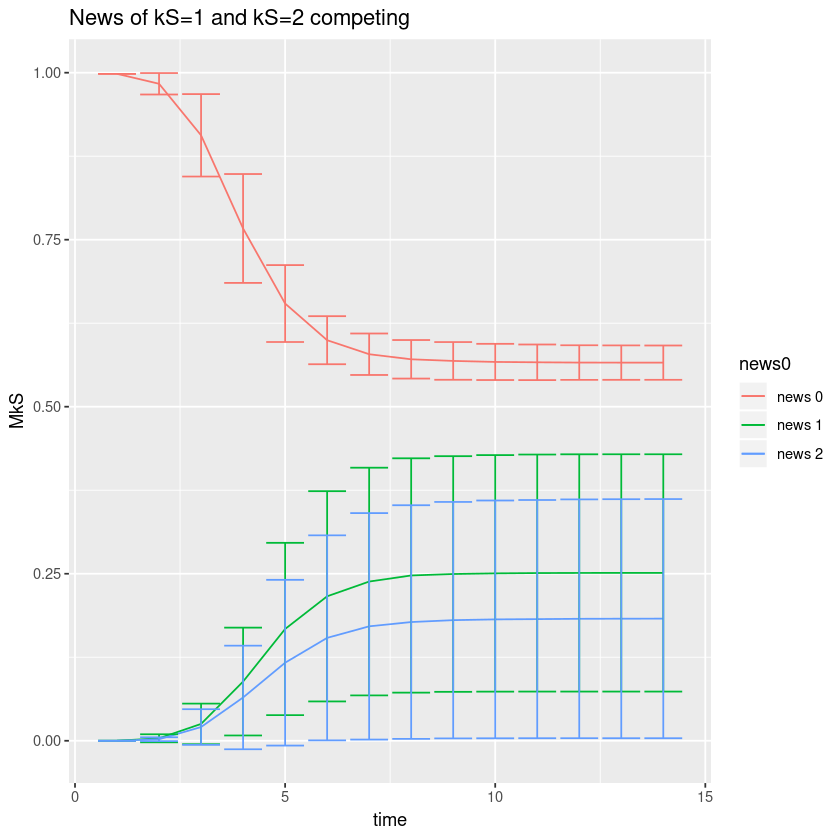

[[1]]


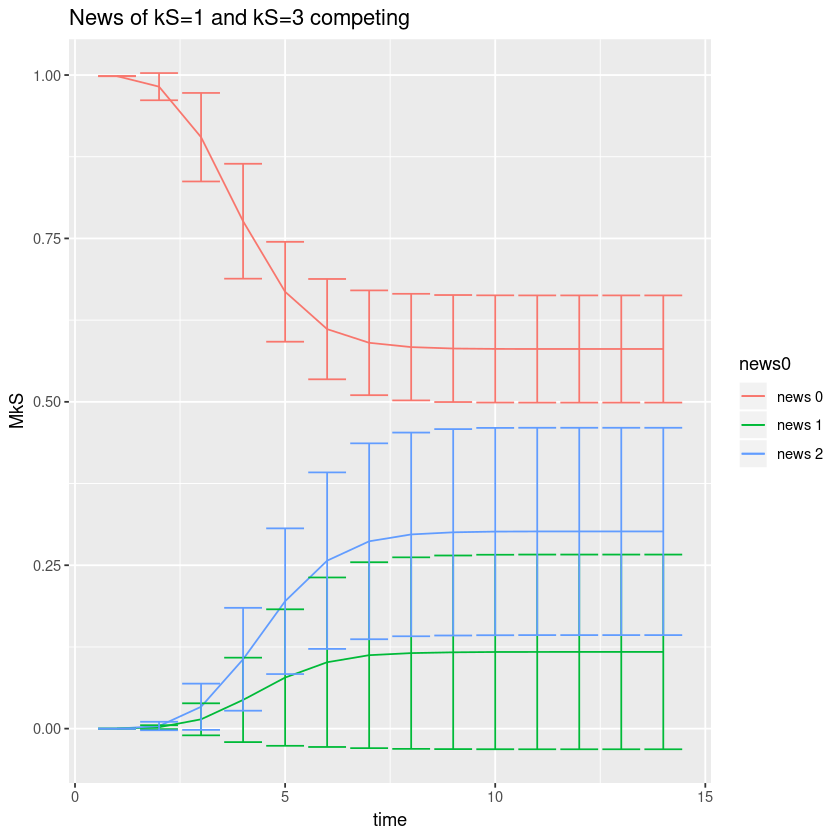

[[1]]


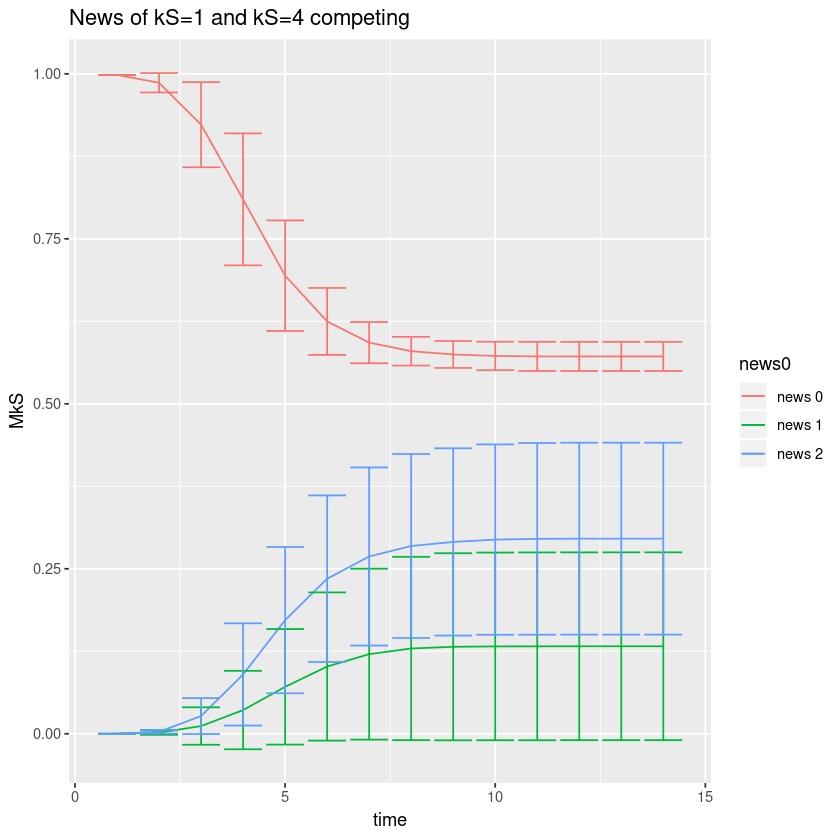

[[1]]


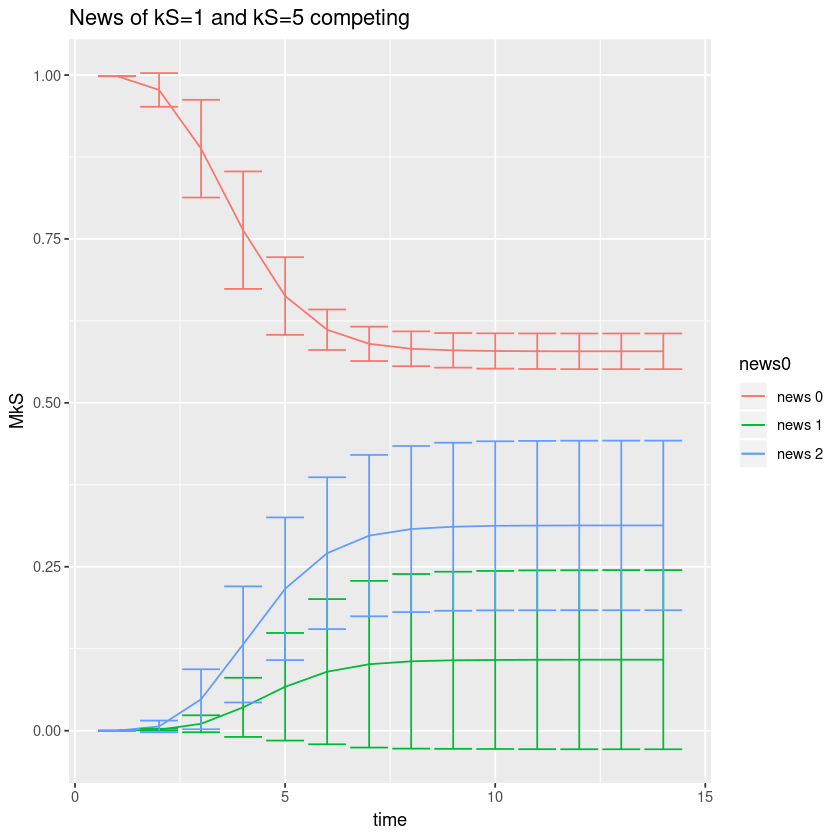

[[1]]


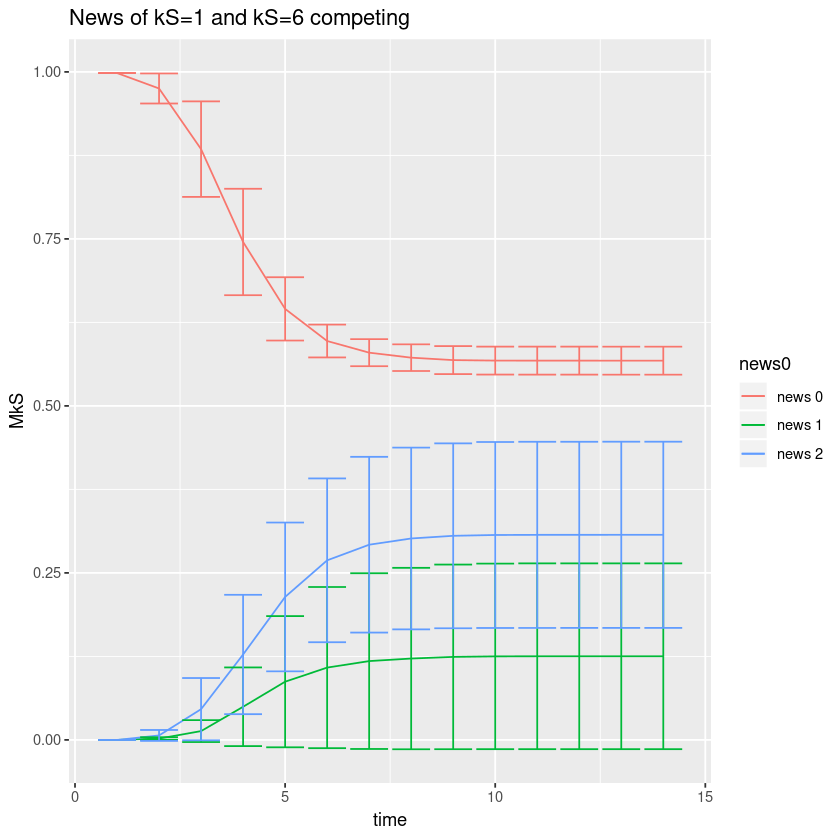

[[1]]


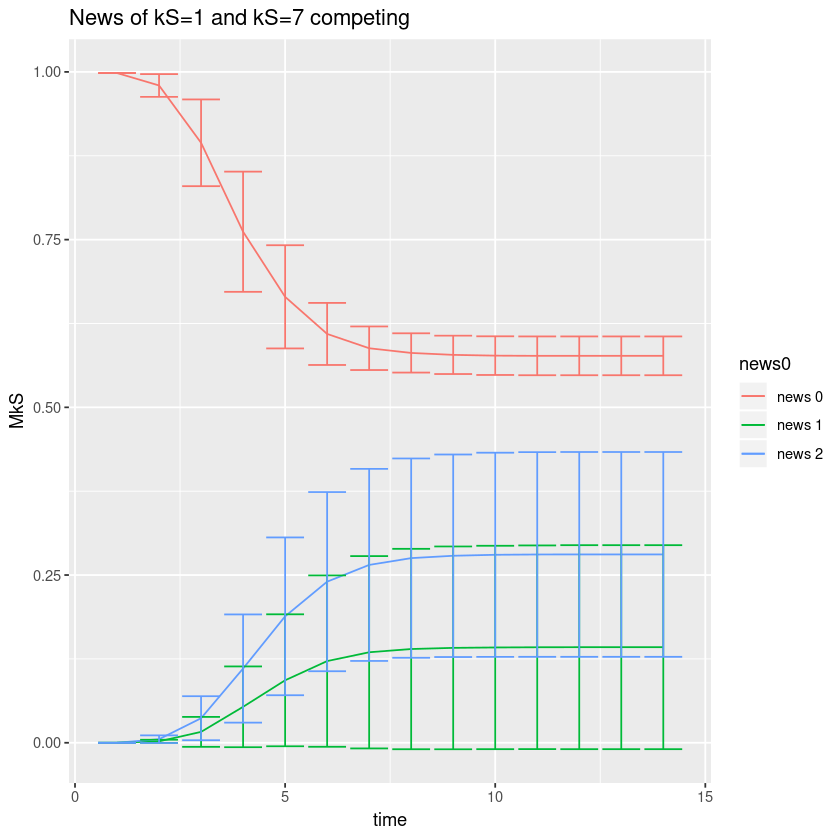

[[1]]


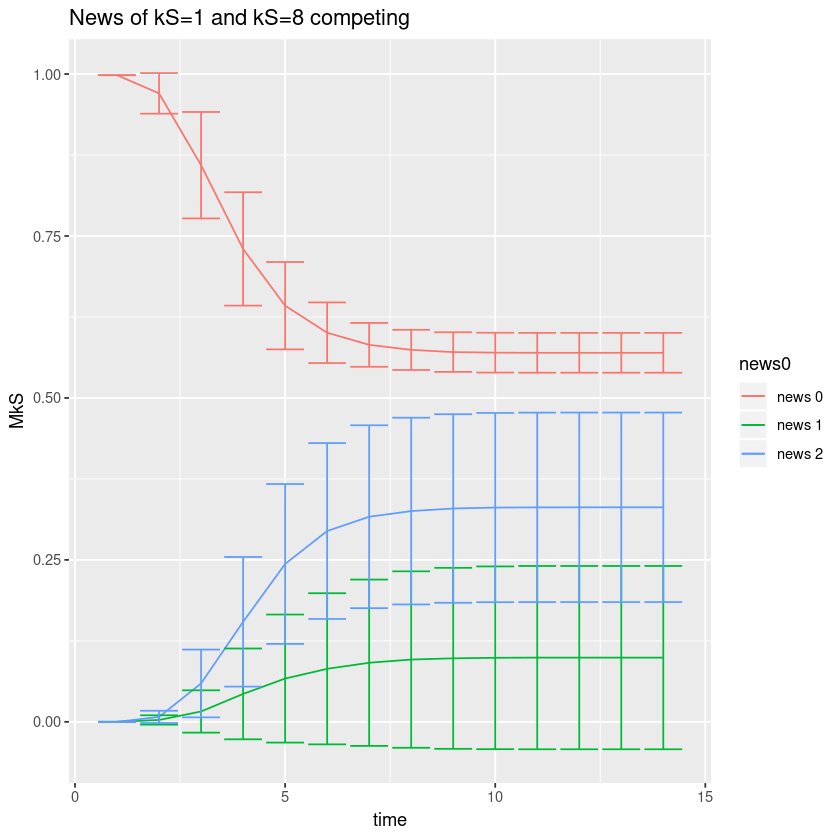

[[1]]


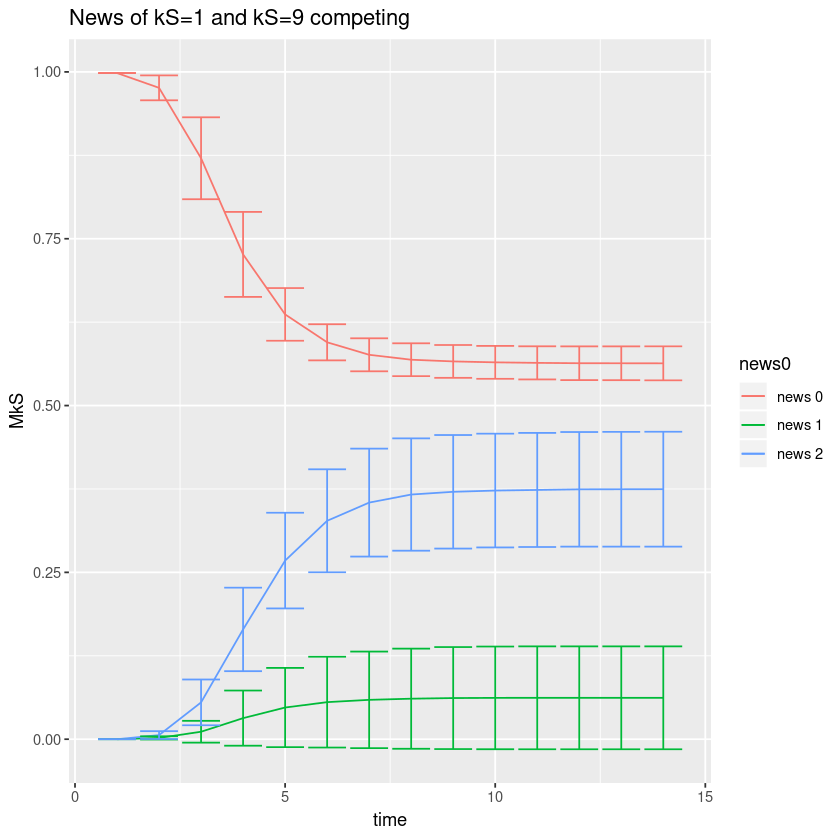

[[1]]


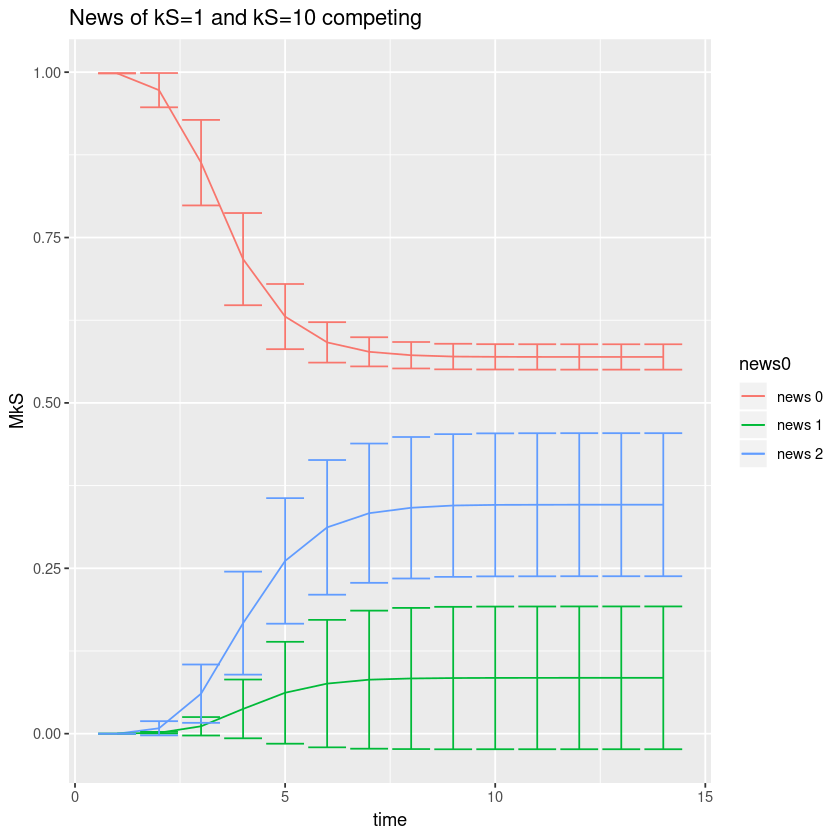

[[1]]
NULL

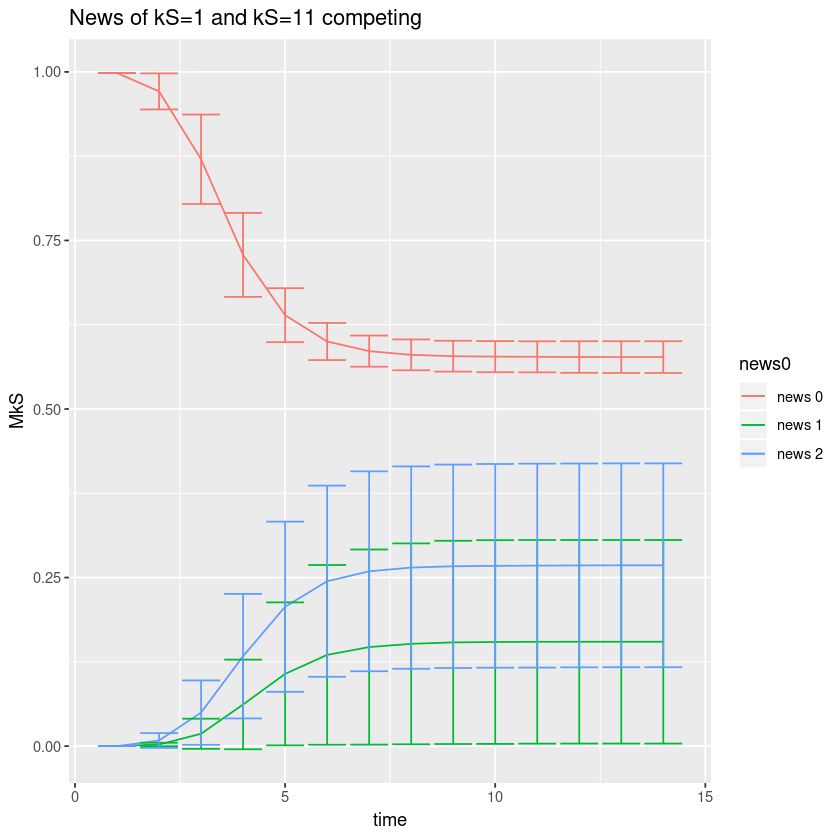

In [211]:
library(gridExtra)

p <- list()

for (i in 2:11){
    oktoplot <- toplot[toplot$sym == paste('1-',toString(i), sep="")]
    p[[i-1]] <-ggplot(oktoplot, aes(time, mean, col=news0 )) + geom_line() + # theme(legend.position="none") 
        geom_errorbar(aes(ymin = mean - std, ymax = mean + std))+
    ggtitle(paste("News of kS=1 and kS=",i," competing", sep="")) +
  xlab("time") + ylab("MkS")
}
p[1]
p[2]
p[3]
p[4]
p[5]
p[6]
p[7] 
p[8]
p[9]
p[10]
p[11]

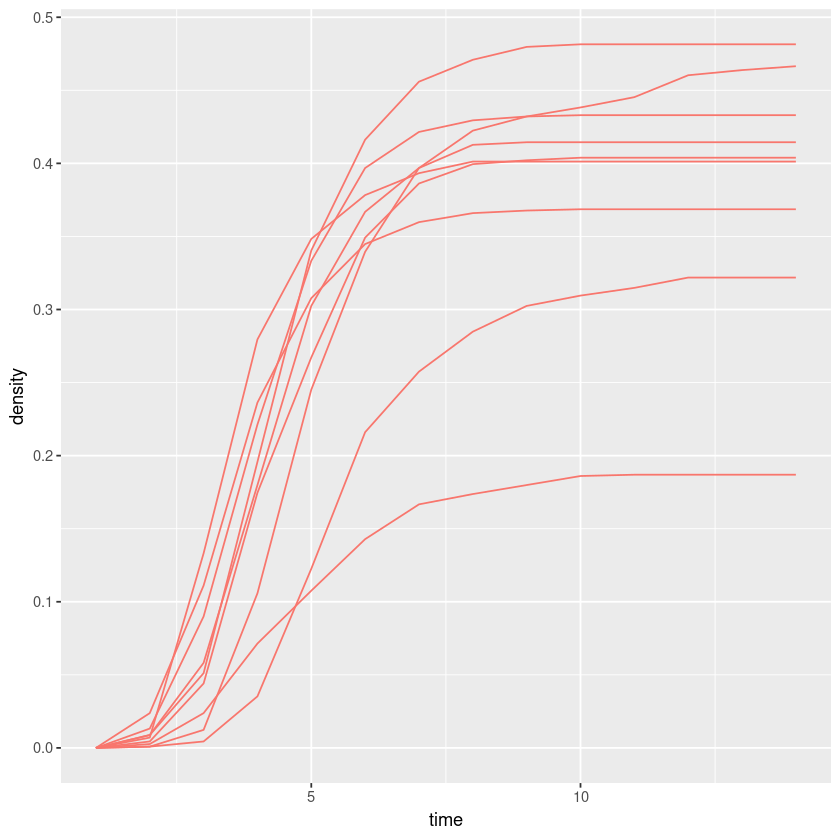

In [89]:
toplot <- rawtable[rawtable$k.core.init == 9]
toplot <- toplot[with(toplot, order(file, news0, time)), ]

toplot<-toplot[toplot$time < 20]

#toplot<-toplot[toplot$news0!="news 0"]
toplot$diff <- ave(toplot$density, toplot$file, FUN=function(x) c(0, diff(x)))
ggplot(toplot, aes(time, density, fill=file, col=news0)) + geom_line() + theme(legend.position="none")

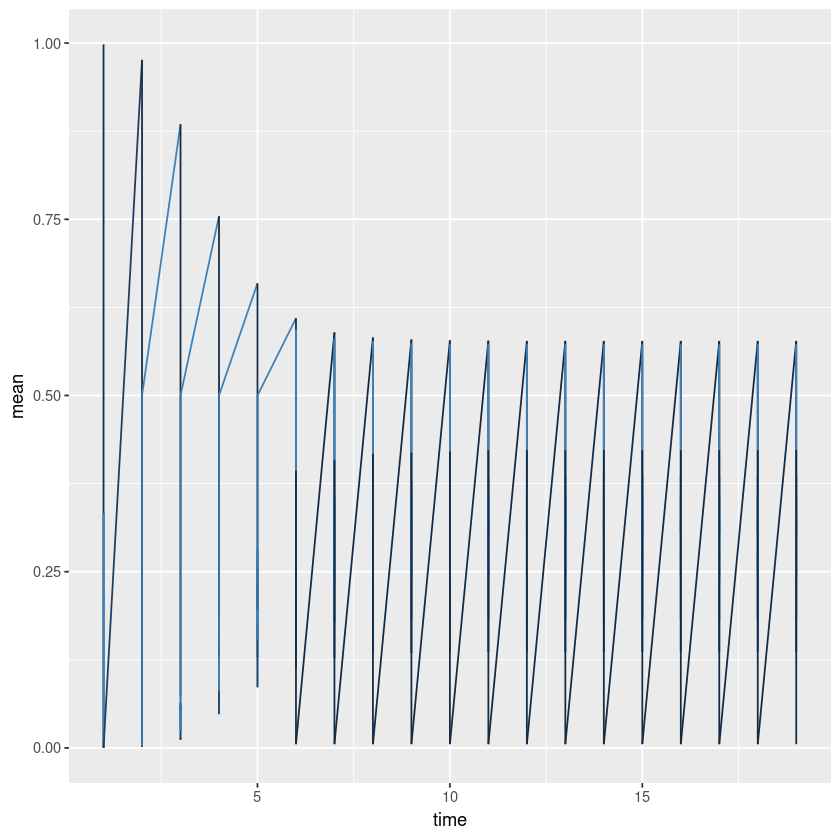

In [76]:
ggplot(toplot, aes(time, mean, col=k.core.init)) + geom_line() + theme(legend.position="none")

In [173]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [174]:
library(data.table)
library(ggplot2)
library(latex2exp)
library(gridExtra)

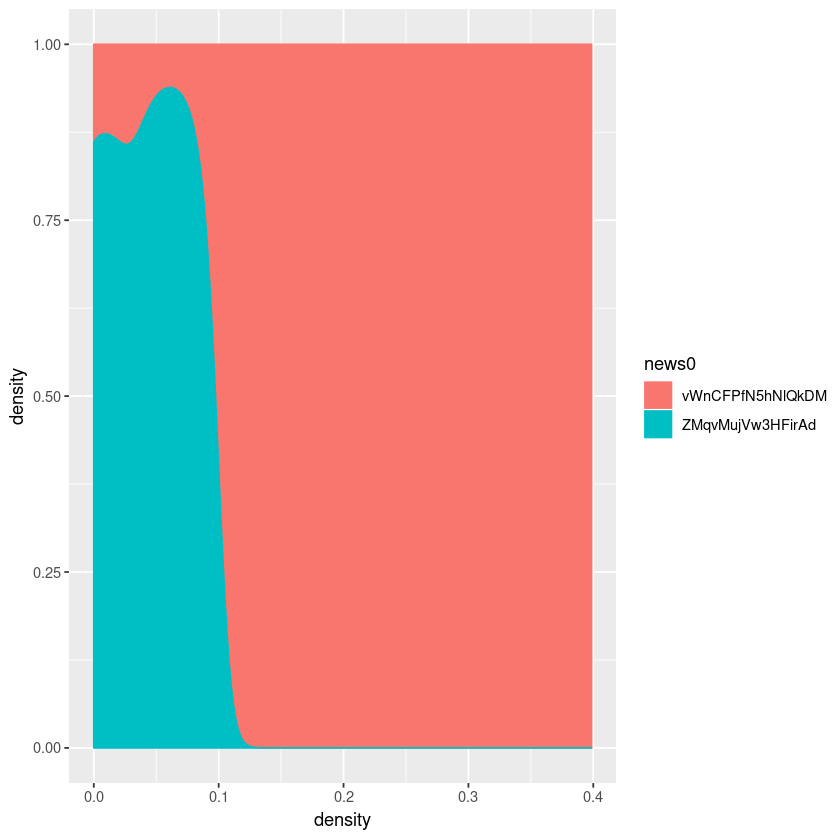

In [175]:
ggplot(toplot, aes(density,fill=news0, col=news0)) +  geom_density(position = "fill") 


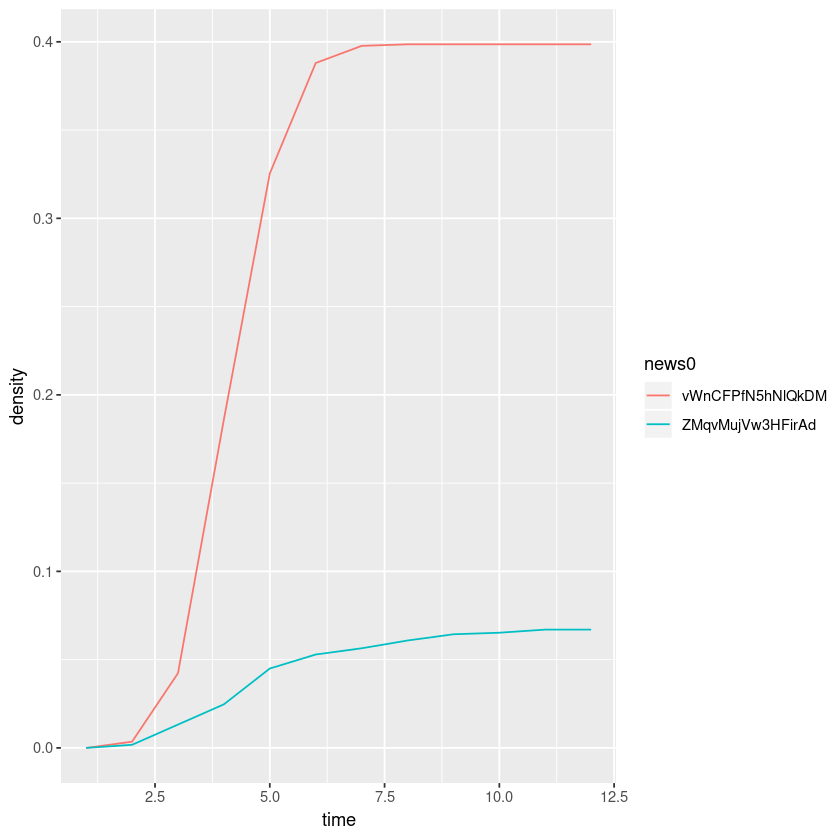

In [161]:
ggplot(toplot, aes(time, density, col=news0)) + geom_line()

In [ ]:
diffrawtable <- rawtable[, diff(density), by=list(time, file)]
sumrawtable <- rawtable[, sum(density), by=list(time, file)]
merge(x = rawtable, y = diffrawtable, by = c("time","file"), all.x = TRUE)

In [ ]:
emptytable <- rawtable

In [ ]:
emptytabletime <- emptytable[emptytable$time == 50]

#emptytabletime <- emptytabletime[emptytabletime$k.core.init > 1]

toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
#toplot
toplot$mean <- emptytabletime[emptytabletime$time == 50][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 50][, sd(density), by=list(time, k.core.init)][,'V1']
#toplot

In [ ]:
toplot = toplot[order(toplot$k.core.init),]

In [ ]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [ ]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)


## All datasets,  single news

Assemble everything and do the loops

In [ ]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    #print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 120]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

In [ ]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [ ]:
emptytable <- rawtable

In [ ]:
emptytabletime <- emptytable[emptytable$time == 120]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.02]
emptytabletime <- emptytabletime[emptytabletime$density > 0.01]
#emptytabletime <- emptytabletime[emptytabletime$k.core.init > 1]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 120][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 120][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [ ]:
toplot[is.na(toplot)] <- 1e-4

In [ ]:
toplot = toplot[order(toplot$k.core.init),]

In [ ]:
typeof(toplot)

In [ ]:
save(emptytabletime,file=paste(mypath, "/", "eptytabletime.Rda", sep=""))
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [ ]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [ ]:
toplot

Plot

In [ ]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [ ]:
f <- function(x,a,b) {a * exp(b * x)} 


In [ ]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y, main="and",
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)


In [ ]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
#lines(x,predict(m),lty=4,col="black",lwd=2)

In [ ]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


Log y plot

In [ ]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [ ]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()